In [1]:
### Useful Variables ###

NUM_SEEDS = 1 # TODO 应该更大！！！
NUM_ROLLOUTS = 100 # TODO 应该更大！！！！
NUM_AGENTS = 50
SAMPLE_MODE = "top"
NUM_WORKER = 10
NORMALIZE = True
STACK = False

ENV_NAME = "BipedalWalker-v2"
RUN_NAME = "PPO"
DEFAULT_CONFIG = {}

YAML_PATH = "data/300-agents-ppo.yaml"
LOCAL_MODE = False

In [2]:
import numpy as np
import pandas
import ray
import yaml
import seaborn as sns
from sklearn.cluster import KMeans

from process_data import make_ordereddict
import logging
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline
ray.init(logging_level=logging.ERROR, ignore_reinit_error=True, log_to_driver=True, local_mode=LOCAL_MODE)

W0821 17:31:50.003571 139861849556736 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term


{'node_ip_address': '10.1.72.24',
 'redis_address': '10.1.72.24:10701',
 'object_store_address': '/tmp/ray/session_2019-08-21_17-31-50_673097_30313/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2019-08-21_17-31-50_673097_30313/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2019-08-21_17-31-50_673097_30313'}

In [3]:
with open(YAML_PATH, 'r') as f:
    checkpoints = yaml.safe_load(f)
agent_ckpt_dict = make_ordereddict(checkpoints, NUM_AGENTS, mode='top')

In [4]:
from process_fft import get_fft_representation
from gym.envs.box2d import BipedalWalker


env_maker = BipedalWalker
        
data_frame_dict, representation_dict = get_fft_representation(
    agent_ckpt_dict, RUN_NAME, ENV_NAME, env_maker, NUM_SEEDS,
    NUM_ROLLOUTS, STACK, NORMALIZE, NUM_WORKER
)


We should stop here and wait!
Getting data from agent <PPO seed=187 rew=282.21>
(pid=30440) WARNING: Logging before flag parsing goes to stderr.
(pid=30440) W0821 17:31:54.939107 140473012090624 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=30440) Instructions for updating:
(pid=30440) non-resource variables are not supported in the long term
(pid=30442) WARNING: Logging before flag parsing goes to stderr.
(pid=30442) W0821 17:31:54.921573 140515386185472 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/compat/v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=30442) Instructions for updating:
(pid=30442) non-resource variables

(pid=30460) 2019-08-21 17:31:55.754052: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=30460) 2019-08-21 17:31:55.766960: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
(pid=30449) 2019-08-21 17:31:55.749137: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
(pid=30447) 2019-08-21 17:31:55.751558: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
(pid=30440) 2019-08-21 17:31:56.022465: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
(pid=30440) 2019-08-21 17:31:56.022537: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: cdc-24
(pid=30440) 2019-08-21 17:

(pid=30442) W0821 17:31:56.773359 140515386185472 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=30442) Instructions for updating:
(pid=30442) Use `tf.cast` instead.
(pid=30440) W0821 17:31:56.854943 140473012090624 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=30440) Instructions for updating:
(pid=30440) Use `tf.cast` instead.
(pid=30470) W0821 17:31:56.873305 139684818650880 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=3047

(pid=30456) W0821 17:31:57.186990 139721177548544 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=30456) Instructions for updating:
(pid=30456) Use tf.where in 2.0, which has the same broadcast rule as np.where
(pid=30460) W0821 17:31:57.178263 140072069805824 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=30460) Instructions for updating:
(pid=30460) Use tf.where in 2.0, which has the same broadcast rule as np.where
(pid=30522) WARNING: Logging before flag parsing goes to stderr.
(pid=30522) W0821 17:32:02.181379 140151615362816 deprecation.py:323] From /home/

(pid=30463) 2019-08-21 17:32:03.051137: W tensorflow/core/common_runtime/colocation_graph.cc:1016] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
(pid=30463)   /job:localhost/replica:0/task:0/device:CPU:0].
(pid=30463) See below for details of this colocation group:
(pid=30463) Colocation Debug Info:
(pid=30463) Colocation group had the following types and supported devices: 
(pid=30463) Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
(pid=30463) Assign: CPU 
(pid=30463) Identity: CPU XLA_CPU 
(pid=30463) VariableV2: CPU 
(pid=30463) 
(pid=30463) Colocation members, user-requested devices, and framework assigned devices, if any:
(pid=30463)   default_pol

(pid=30465) 2019-08-21 17:32:03.530774: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2599845000 Hz
(pid=30465) 2019-08-21 17:32:03.533018: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x558adcf29310 executing computations on platform Host. Devices:
(pid=30465) 2019-08-21 17:32:03.533071: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
(pid=30465) W0821 17:32:03.543201 140120428209920 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/fcnet_v1.py:48: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
(pid=30465) Instructions for updating:
(pid=30465) Use keras.layers.dense instead.
(pid=30527) 2019-08-21 17:32:03.521963: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=30527) 2019-08-21 

(pid=30538) 2019-08-21 17:32:04.185876: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=30538) 2019-08-21 17:32:04.198715: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
(pid=30521) 2019-08-21 17:32:04.200808: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=30521) 2019-08-21 17:32:04.214504: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
(pid=30461) 2019-08-21 17:32:04.246994: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=30461) 2019-08-21 17:32:04.262667: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic libr

(pid=30522) 2019-08-21 17:32:04.387231: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or set the envvar XLA_FLAGS=--xla_hlo_profile.
(pid=30465) W0821 17:32:04.447499 140120428209920 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=30465) Instructions for updating:
(pid=30465) Use `tf.cast` instead.
(pid=30532) W0821 17:32:04.495032 140595654788864 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_act

(pid=30470) Worker7 is reset!
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30521) W0821 17:32:05.157633 139711497430784 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=30521) Instructions for updating:
(pid=30521) Use `tf.cast` instead.
(pid=30452) W0821 17:32:05.299681 139774844430080 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=30452) Instructions for updating:
(pid=30452) Use `tf.cast` instead.
(pid=30521) 2019-08-21 17:32:05.299164: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA

(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30442) Agent [2/50

(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 10/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 11/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 13/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 13/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 13/100
(pid=30470) 

(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 19/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 21/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 19/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 21/100
(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 18/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 18/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 22/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 20/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 18/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 21/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 20/100
(pid=30456) 

(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 25/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 29/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 27/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 25/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 27/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 31/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 29/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 28/100
(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=30460) A

(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 35/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 38/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 40/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 32/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 35/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 39/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 39/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 36/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 37/100
(pid=30440) A

(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 47/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 43/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 39/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 47/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 49/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 43/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 43/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 45/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=30447) A

(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 55/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 52/100
(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 50/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 51/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 55/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 51/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 51/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 58/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 47/100
(pid=30454)

(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 66/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 63/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 59/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 59/100
(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 59/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 58/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 54/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 61/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 67/100
(pid=30445) 

(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 63/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 75/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 65/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 67/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 69/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 61/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 67/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 73/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 76/100
(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30442)

(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 75/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 84/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 81/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 74/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 75/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 73/100
(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 71/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 80/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 75/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 82/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 85/100
(pid=30447) 

(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 78/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 88/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 83/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 83/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 83/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 81/100
(pid=30460) Agent [10/50] <PPO seed=113 rew=283.29>, Seed No.1/1 (Real: 0), Rollout 90/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 85/100
(pid=30456) Agent [3/50] <PPO seed=203 rew=282.25>, Seed No.1/1 (Real: 0), Rollout 94/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 76/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 89/100
(pid=30440) A

(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 94/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 91/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 83/100
(pid=30440) Agent [7/50] <PPO seed=116 rew=283.13>, Seed No.1/1 (Real: 0), Rollout 86/100
(pid=30470) Agent [8/50] <PPO seed=70 rew=283.20>, Seed No.1/1 (Real: 0), Rollout 89/100
(pid=30442) Agent [2/50] <PPO seed=98 rew=282.24>, Seed No.1/1 (Real: 0), Rollout 91/100
(pid=30447) Agent [4/50] <PPO seed=197 rew=282.48>, Seed No.1/1 (Real: 0), Rollout 91/100
(pid=30445) Agent [5/50] <PPO seed=71 rew=282.55>, Seed No.1/1 (Real: 0), Rollout 97/100
(pid=30463) Agent [6/50] <PPO seed=283 rew=282.79>, Seed No.1/1 (Real: 0), Rollout 92/100
(pid=30454) Agent [9/50] <PPO seed=201 rew=283.28>, Seed No.1/1 (Real: 0), Rollout 95/100
(pid=30449) Agent [1/50] <PPO seed=187 rew=282.21>, Seed No.1/1 (Real: 0), Rollout 84/100
(pid=30440) A

Getting data from agent <PPO seed=283 rew=282.79>
Getting data from agent <PPO seed=116 rew=283.13>
Getting data from agent <PPO seed=70 rew=283.20>
Getting data from agent <PPO seed=201 rew=283.28>
Getting data from agent <PPO seed=113 rew=283.29>
We should stop here and wait!
Getting data from agent <PPO seed=7 rew=283.41>
(pid=30449) 2019-08-21 17:35:43.665006: W tensorflow/core/common_runtime/colocation_graph.cc:1016] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
(pid=30449)   /job:localhost/replica:0/task:0/device:CPU:0].
(pid=30449) See below for details of this colocation group:
(pid=30449) Colocation Debug Info:
(pid=30449) Colocation group had the following types and supported devices: 
(pid=30449) Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_d

(pid=30445) 2019-08-21 17:35:43.997229: W tensorflow/core/common_runtime/colocation_graph.cc:1016] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
(pid=30445)   /job:localhost/replica:0/task:0/device:CPU:0].
(pid=30445) See below for details of this colocation group:
(pid=30445) Colocation Debug Info:
(pid=30445) Colocation group had the following types and supported devices: 
(pid=30445) Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
(pid=30445) Assign: CPU 
(pid=30445) Identity: CPU XLA_CPU 
(pid=30445) VariableV2: CPU 
(pid=30445) 
(pid=30445) Colocation members, user-requested devices, and framework assigned devices, if any:
(pid=30445)   default_pol

(pid=30442) Worker1 is reset!
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30463) Worker5 is reset!
(pid=30470) Worker7 is reset!
(pid=30460) Worker9 is reset!
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30454) Worker8 is reset!
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30456) Worker2 is reset!
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30449) Worker0 is reset!
(pid=30440) Worker6 is reset!
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30447) Worker3 is reset!
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30447) Ag

(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30444) 2019-08-21 17:35:51.345585: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=30444) 2019-08-21 17:35:51.361230: I tensorflow/stream_executor/platform/default/dso_loader

(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30444) W0821 17:35:52.704241 139883854497536 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=30444) Instructions for updating:
(pid=30444) Use `tf.cast` instead.
(pid=30450) W0821 17:35:52.723898 140040302540544 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from ten

(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30451) W0821 17:35:53.296638 140154357765888 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=30451) Instructions for updating:
(pid=30451) Use tf.where in 2.0, which has the same broadcast rule as np.where
(pid=30468) W0821 17:35:53.364937 140226512103168 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=30468) Instructions for updating:
(pid=30468) Use tf.where in 2.0, which has the 

(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 13/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 10/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 11/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 13/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 11/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 11/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 11/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 14/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 11/100
(pi

(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 18/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 19/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 18/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 19/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 21/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 23/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 22/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 21/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 18/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 19/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 19/100
(pid=

(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 29/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 27/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 25/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 27/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 32/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 31/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=

(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 39/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 34/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 32/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 36/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 39/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 39/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 34/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 34/100
(pi

(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 47/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 42/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 39/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 50/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 47/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 44/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 42/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 42/100
(pi

(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 51/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 55/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 46/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 49/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 50/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 60/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 50/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 49/100
(pi

(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 68/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 63/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 57/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 57/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 60/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 65/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 69/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 57/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 54/100
(pi

(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 67/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 63/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 65/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 73/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 78/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 73/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 65/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 61/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 73/100
(pid

(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 81/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 75/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 81/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 86/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 71/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 82/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 73/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 67/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 73/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 82/100
(pid

(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 78/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 89/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 74/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 80/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 83/100
(pid=30454) Agent [19/50] <PPO seed=160 rew=284.55>, Seed No.1/1 (Real: 0), Rollout 96/100
(pid=30440) Agent [17/50] <PPO seed=88 rew=283.96>, Seed No.1/1 (Real: 0), Rollout 91/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 90/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 81/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 79/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 81/100
(pi

(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 86/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 89/100
(pid=30449) Agent [11/50] <PPO seed=7 rew=283.41>, Seed No.1/1 (Real: 0), Rollout 88/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 98/100
(pid=30447) Agent [14/50] <PPO seed=159 rew=283.72>, Seed No.1/1 (Real: 0), Rollout 82/100
(pid=30445) Agent [15/50] <PPO seed=112 rew=283.85>, Seed No.1/1 (Real: 0), Rollout 92/100
(pid=30470) Agent [18/50] <PPO seed=250 rew=284.10>, Seed No.1/1 (Real: 0), Rollout 89/100
(pid=30456) Agent [13/50] <PPO seed=125 rew=283.66>, Seed No.1/1 (Real: 0), Rollout 99/100
(pid=30442) Agent [12/50] <PPO seed=128 rew=283.51>, Seed No.1/1 (Real: 0), Rollout 87/100
(pid=30460) Agent [20/50] <PPO seed=149 rew=284.60>, Seed No.1/1 (Real: 0), Rollout 90/100
(pid=30463) Agent [16/50] <PPO seed=81 rew=283.91>, Seed No.1/1 (Real: 0), Rollout 99/100
(pi

Getting data from agent <PPO seed=88 rew=283.96>
Getting data from agent <PPO seed=250 rew=284.10>
Getting data from agent <PPO seed=160 rew=284.55>
Getting data from agent <PPO seed=149 rew=284.60>
We should stop here and wait!
Getting data from agent <PPO seed=76 rew=284.69>
(pid=30440) 2019-08-21 17:39:18.087662: W tensorflow/core/common_runtime/colocation_graph.cc:1016] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
(pid=30440)   /job:localhost/replica:0/task:0/device:CPU:0].
(pid=30440) See below for details of this colocation group:
(pid=30440) Colocation Debug Info:
(pid=30440) Colocation group had the following types and supported devices: 
(pid=30440) Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='/device:GPU

(pid=30456) 2019-08-21 17:39:18.447220: W tensorflow/core/common_runtime/colocation_graph.cc:1016] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
(pid=30456)   /job:localhost/replica:0/task:0/device:CPU:0].
(pid=30456) See below for details of this colocation group:
(pid=30456) Colocation Debug Info:
(pid=30456) Colocation group had the following types and supported devices: 
(pid=30456) Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
(pid=30456) Assign: CPU 
(pid=30456) Identity: CPU XLA_CPU 
(pid=30456) VariableV2: CPU 
(pid=30456) 
(pid=30456) Colocation members, user-requested devices, and framework assigned devices, if any:
(pid=30456)   default_pol

(pid=30440) Worker6 is reset!
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30460) Worker9 is reset!
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30463) Worker5 is reset!
(pid=30470) Worker7 is reset!
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30454) Worker8 is reset!
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30449) Worker0 is reset!
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30442) Worker1 is reset!
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30447) Worker3 is reset!
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=2

(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30443) 2019-08-21 17:39:24.829581: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=30443) 2019-08-21 17:39:24.844364: I tensorflow/stream_executor/platform/default/dso_loader.

(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30448) W0821 17:39:26.067998 139641740465920 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=30448) Instructions for updating:
(pid=30448) Use `tf.cast` instead.
(pid=30466) W0821 17:39:26.112746 140649241569024 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber

(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 5/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 5/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 5/100
(pid=30449) Age

(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 11/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 11/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 11/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 13/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 13/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 13/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 13/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 13/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 12/100
(pid=

(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 19/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 21/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 18/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 19/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 19/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 21/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 22/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 20/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 22/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 22/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 22/100
(pid=

(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 29/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 27/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 29/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 31/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 27/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 31/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 28/100
(pid=

(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 36/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 34/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 40/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 35/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 34/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 37/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 40/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 39/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 34/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 34/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 37/100
(pid=

(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 44/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 42/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 46/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 50/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 47/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 49/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 43/100
(pid=

(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 54/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 57/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 51/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 58/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 51/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 49/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 50/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 49/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 55/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 49/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 55/100
(pid

(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 63/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 57/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 67/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 59/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 57/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 68/100
(pi

(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 76/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 66/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 78/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 65/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 67/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 77/100
(pid=

(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 71/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 80/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 74/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 85/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 88/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 74/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 81/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=

(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 96/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 89/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 89/100
(pid=30470) Agent [28/50] <PPO seed=20 rew=285.95>, Seed No.1/1 (Real: 0), Rollout 94/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 81/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 79/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 79/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 82/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 80/100
(pid=30449) Agent [21/50] <PPO seed=76 rew=284.69>, Seed No.1/1 (Real: 0), Rollout 97/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 80/100
(pid=

(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 98/100
(pid=30460) Agent [30/50] <PPO seed=104 rew=286.29>, Seed No.1/1 (Real: 0), Rollout 87/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 87/100
(pid=30445) Agent [25/50] <PPO seed=267 rew=285.54>, Seed No.1/1 (Real: 0), Rollout 88/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 91/100
(pid=30440) Agent [27/50] <PPO seed=73 rew=285.69>, Seed No.1/1 (Real: 0), Rollout 90/100
(pid=30463) Agent [26/50] <PPO seed=178 rew=285.63>, Seed No.1/1 (Real: 0), Rollout 88/100
(pid=30456) Agent [23/50] <PPO seed=273 rew=285.04>, Seed No.1/1 (Real: 0), Rollout 99/100
(pid=30447) Agent [24/50] <PPO seed=85 rew=285.43>, Seed No.1/1 (Real: 0), Rollout 92/100
(pid=30442) Agent [22/50] <PPO seed=147 rew=285.01>, Seed No.1/1 (Real: 0), Rollout 99/100
(pid=30454) Agent [29/50] <PPO seed=38 rew=286.04>, Seed No.1/1 (Real: 0), Rollout 88/100
(pid

(pid=30447) 2019-08-21 17:42:41.815505: W tensorflow/core/common_runtime/colocation_graph.cc:1016] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
(pid=30447)   /job:localhost/replica:0/task:0/device:CPU:0].
(pid=30447) See below for details of this colocation group:
(pid=30447) Colocation Debug Info:
(pid=30447) Colocation group had the following types and supported devices: 
(pid=30447) Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
(pid=30447) Assign: CPU 
(pid=30447) Identity: CPU XLA_CPU 
(pid=30447) VariableV2: CPU 
(pid=30447) 
(pid=30447) Colocation members, user-requested devices, and framework assigned devices, if any:
(pid=30447)   default_pol

(pid=30442) Worker1 is reset!
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30447) Worker3 is reset!
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30440) Worker6 is reset!
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30460) Worker9 is reset!
(pid=30454) Worker8 is reset!
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30470) Worker7 is reset!
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30449) Worker0 is reset!
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30456) Worker2 is reset!
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30445) Worker4 is reset!
(pid=30445) 

(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=6869) 2019-08-21 17:42:48.811626: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=6868) 2019-08-21 17:42:48.809037: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pi

(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=6869) W0821 17:42:50.077752 139830400038656 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=6869) Instructions for updating:
(pid=6869) Use `tf.cast` instead.
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 4/100
(pid=30464) W0821 17:42:50.194095 140358764832512 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/l

(pid=30471) W0821 17:42:50.493473 140490375341824 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=30471) Instructions for updating:
(pid=30471) Use tf.where in 2.0, which has the same broadcast rule as np.where
(pid=6866) 2019-08-21 17:42:50.463378: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or set the envvar XLA_FLAGS=--xla_hlo_profile.
(pid=6868) W0821 17:42:50.488073 140300884424448 deprecation.py:323] From /home/zhpeng/anac

(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 6/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 6/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 6/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 6/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 8/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 7/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 8/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 8/100
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 7/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 8/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 7/100
(pid=30445) Age

(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 16/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 14/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 14/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 16/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 15/100
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 15/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 17/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 17/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 14/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 17/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 15/100
(pid=

(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 22/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 25/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 25/100
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 22/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 25/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 22/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 25/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 23/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 21/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 23/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=3

(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 27/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 35/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 34/100
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 31/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 35/100
(pid

(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 38/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 39/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 43/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 38/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 38/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 43/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 34/100
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 38/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 39/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=3

(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 49/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 51/100
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 45/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 51/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 49/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 47/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 46/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 46/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 50/100
(pid=

(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 52/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 55/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 59/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 57/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 60/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 58/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 55/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 55/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 59/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 54/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=

(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 65/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 68/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 63/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 67/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 62/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 63/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 68/100
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 60/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 55/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 62/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 66/100
(pid=3

(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 67/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 69/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 73/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 76/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 76/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 70/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 71/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 77/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 62/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 70/100
(pid

(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 74/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 85/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 84/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 81/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 79/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 69/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 78/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 85/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 78/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 81/100
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 75/100
(pid

(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 87/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 89/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 85/100
(pid=30470) Agent [38/50] <PPO seed=274 rew=288.90>, Seed No.1/1 (Real: 0), Rollout 93/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 86/100
(pid=30449) Agent [31/50] <PPO seed=164 rew=286.42>, Seed No.1/1 (Real: 0), Rollout 93/100
(pid=30463) Agent [36/50] <PPO seed=26 rew=287.09>, Seed No.1/1 (Real: 0), Rollout 94/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 89/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 76/100
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 82/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 88/100
(pid

(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 98/100
Getting data from agent <PPO seed=1 rew=286.70>
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 98/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81>, Seed No.1/1 (Real: 0), Rollout 96/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 94/100
(pid=30440) Agent [37/50] <PPO seed=135 rew=287.60>, Seed No.1/1 (Real: 0), Rollout 83/100
(pid=30454) Agent [39/50] <PPO seed=188 rew=289.03>, Seed No.1/1 (Real: 0), Rollout 90/100
(pid=30447) Agent [34/50] <PPO seed=153 rew=286.99>, Seed No.1/1 (Real: 0), Rollout 95/100
(pid=30442) Agent [32/50] <PPO seed=1 rew=286.70>, Seed No.1/1 (Real: 0), Rollout 99/100
(pid=30445) Agent [35/50] <PPO seed=5 rew=287.08>, Seed No.1/1 (Real: 0), Rollout 99/100
(pid=30460) Agent [40/50] <PPO seed=255 rew=289.15>, Seed No.1/1 (Real: 0), Rollout 95/100
(pid=30456) Agent [33/50] <PPO seed=146 rew=286.81

(pid=30460) 2019-08-21 17:46:27.664307: W tensorflow/core/common_runtime/colocation_graph.cc:1016] Failed to place the graph without changing the devices of some resources. Some of the operations (that had to be colocated with resource generating operations) are not supported on the resources' devices. Current candidate devices are [
(pid=30460)   /job:localhost/replica:0/task:0/device:CPU:0].
(pid=30460) See below for details of this colocation group:
(pid=30460) Colocation Debug Info:
(pid=30460) Colocation group had the following types and supported devices: 
(pid=30460) Root Member(assigned_device_name_index_=-1 requested_device_name_='/device:GPU:0' assigned_device_name_='' resource_device_name_='/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
(pid=30460) Assign: CPU 
(pid=30460) Identity: CPU XLA_CPU 
(pid=30460) VariableV2: CPU 
(pid=30460) 
(pid=30460) Colocation members, user-requested devices, and framework assigned devices, if any:
(pid=30460)   default_pol

(pid=30470) Worker7 is reset!
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30460) Worker9 is reset!
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30454) Worker8 is reset!
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30445) Worker4 is reset!
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30440) Worker6 is reset!
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30442) Worker1 is reset!
(pid=30449) Worker0 is reset!
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30447) Worker3 is reset!
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 0/100
(pid=30463) Worker5 is reset!
(pid=30463)

(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 2/100
(pid=6934) 2019-08-21 17:46:33.481877: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=6928) 2019-08-21 17:46:33.479768: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=6921) 2019-08-21 17:46:33.479512: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=6919) 2019-08-21 17:46:33.479159: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
(pid=6927) 2019-08-21 17:46:33.484610: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to

(pid=6918) W0821 17:46:33.901768 140109056915200 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/fcnet_v1.py:48: dense (from tensorflow.python.layers.core) is deprecated and will be removed in a future version.
(pid=6918) Instructions for updating:
(pid=6918) Use keras.layers.dense instead.
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=6928) W0821 17:46:34.700364 140378416854784 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
(pid=6928) Instructions for updating:
(pid=6928) Use `tf.cast` instead.
(pid=6921) W0821 17:46:34.697302 140673123796736 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/ray/rllib/models/tf/tf_action_dist.py:138: to_float (from tensorflow.pytho

(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 3/100
(pid=6911) W0821 17:46:35.134708 139712220743424 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=6911) Instructions for updating:
(pid=6911) Use tf.where in 2.0, which has the same broadcast rule as np.where
(pid=6936) W0821 17:46:35.125424 140212285949696 deprecation.py:323] From /home/zhpeng/anaconda3/envs/uber/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
(pid=6936) Instructions for updating:
(pid=6936) Use tf.where in 2.0, which has the same broadcast rule as np.where
(pid=6918) W0821 17:46:35.147278 140109056915200 deprecation.p

(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 8/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 9/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 9/100
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 8/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 9/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 9/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 9/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 9/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 9/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 9/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 10/100
(pid=30463

(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 17/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 17/100
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 15/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 17/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 16/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 17/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 17/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 17/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 18/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 18/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 18/100
(

(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 25/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 24/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 25/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 24/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 25/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 23/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 26/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 25/100


(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 30/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 35/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 32/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 32/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 34/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 33/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 34/100


(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 40/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 40/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 40/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 42/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 44/100
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 38/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 40/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 41/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 42/100


(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 52/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 45/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 49/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 49/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 50/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 48/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 50/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 49/100


(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 58/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 55/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 53/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 57/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 57/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 62/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 56/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 58/100
(

(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 60/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 65/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 70/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 63/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 63/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 64/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 67/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 66/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 65/100
(

(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 75/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 71/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 70/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 73/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 79/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 76/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 72/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 73/100


(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 80/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 87/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 83/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 78/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 80/100
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 75/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 79/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 80/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 81/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 80/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 84/100


(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 87/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 86/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 89/100
(pid=30456) Agent [43/50] <PPO seed=289 rew=289.88>, Seed No.1/1 (Real: 0), Rollout 96/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 88/100
(pid=30449) Agent [41/50] <PPO seed=193 rew=289.17>, Seed No.1/1 (Real: 0), Rollout 92/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 88/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 88/100
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 83/100
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 87/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 89/100


(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 95/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 95/100
(pid=30463) Agent [46/50] <PPO seed=180 rew=291.69>, Seed No.1/1 (Real: 0), Rollout 97/100
(pid=30470) Agent [48/50] <PPO seed=17 rew=294.70>, Seed No.1/1 (Real: 0), Rollout 97/100
(pid=30445) Agent [45/50] <PPO seed=213 rew=291.07>, Seed No.1/1 (Real: 0), Rollout 92/100
(pid=30447) Agent [44/50] <PPO seed=154 rew=290.68>, Seed No.1/1 (Real: 0), Rollout 97/100
Getting data from agent <PPO seed=122 rew=289.20>
(pid=30442) Agent [42/50] <PPO seed=122 rew=289.20>, Seed No.1/1 (Real: 0), Rollout 95/100
(pid=30440) Agent [47/50] <PPO seed=152 rew=293.22>, Seed No.1/1 (Real: 0), Rollout 95/100
(pid=30460) Agent [50/50] <PPO seed=121 rew=299.35>, Seed No.1/1 (Real: 0), Rollout 96/100
(pid=30454) Agent [49/50] <PPO seed=292 rew=299.01>, Seed No.1/1 (Real: 0), Rollout 96/100
(pid=30470) Agent [48/50] <PPO seed=17 re

In [5]:
from process_fft import parse_result_all_method
method_df_dict = parse_result_all_method(representation_dict)

In [6]:
method_df_dict.keys()

dict_keys(['MN_sequenceL', 'M_N_sequenceL'])

In [7]:
method_df_dict['MN_sequenceL']

,0,1,2,3,4,5,6,7,8,9,...,13990,13991,13992,13993,13994,13995,13996,13997,13998,13999
PPO seed=187 rew=282.21,-0.755848,-4.151776,-3.984061,-4.027956,-4.073442,-3.890851,-3.912400,-3.930993,-3.969927,-3.967888,...,-4.971750,-5.076284,-4.969244,-4.984772,-5.134775,-5.101185,-5.136355,-5.064492,-5.056282,-5.070216
PPO seed=98 rew=282.24,-0.669514,-3.874027,-3.862653,-3.834117,-3.909695,-3.854058,-3.836129,-3.876071,-3.965036,-3.995721,...,-5.007822,-4.858887,-4.914189,-4.867066,-4.956465,-4.912242,-5.138001,-4.918125,-5.048092,-5.026818
PPO seed=203 rew=282.25,-0.690835,-3.777518,-3.690216,-3.665016,-3.740944,-3.653101,-3.727572,-3.780142,-3.700253,-4.032480,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PPO seed=197 rew=282.48,-0.686349,-4.006567,-3.782340,-3.866720,-3.907487,-3.868713,-3.864149,-3.817958,-3.950583,-3.991150,...,-5.052365,-5.095721,-5.210970,-5.061739,-4.998070,-5.100728,-5.219466,-5.258613,-5.117266,-5.090591
PPO seed=71 rew=282.55,-0.736672,-3.404342,-3.540312,-3.548643,-3.604811,-3.468474,-3.665385,-3.653796,-3.629851,-3.780613,...,-5.041445,-4.775189,-5.224125,-4.723045,-5.370679,-4.469051,-5.296391,-4.734456,-4.701918,-5.146353
PPO seed=283 rew=282.79,-0.676922,-3.806342,-3.804363,-3.758749,-3.845643,-3.789323,-3.907793,-3.960828,-4.020524,-4.009703,...,-5.212549,-5.014006,-4.837045,-4.848409,-5.115057,-5.125731,-4.834504,-5.060608,-4.560751,-5.061730
PPO seed=116 rew=283.13,-0.711583,-4.192613,-4.216617,-4.110911,-3.994632,-3.956792,-4.138452,-4.099042,-4.167294,-4.057202,...,-5.118170,-5.140317,-5.085937,-5.149040,-5.112288,-5.079149,-5.146866,-5.149866,-5.116717,-5.154461
PPO seed=70 rew=283.20,-0.684487,-4.566054,-4.402761,-4.437310,-4.266277,-4.222455,-4.275146,-4.205303,-4.255661,-4.169358,...,-5.156417,-5.245882,-5.303414,-5.274747,-5.209010,-5.148847,-5.251880,-5.338884,-5.150401,-5.186135
PPO seed=201 rew=283.28,-0.692359,-3.886505,-3.928667,-3.739571,-3.773878,-3.757922,-3.739855,-3.743857,-3.748398,-3.833631,...,-5.390855,-5.039166,-5.259400,-4.796102,-4.869733,-6.438142,-5.182277,-4.632794,-4.448978,-5.375106
PPO seed=113 rew=283.29,-0.783695,-3.468113,-3.632138,-3.553035,-3.630166,-3.698005,-3.586667,-3.651819,-3.942250,-3.708841,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
method_df_dict['M_N_sequenceL']

,0,1,2,3,4,5,6,7,8,9,...,13990,13991,13992,13993,13994,13995,13996,13997,13998,13999
PPO seed=187 rew=282.21,-0.755848,-4.151776,-3.984061,-4.027956,-4.073442,-3.890851,-3.912400,-3.930993,-3.969927,-3.967888,...,-4.971750,-5.076284,-4.969244,-4.984772,-5.134775,-5.101185,-5.136355,-5.064492,-5.056282,-5.070216
PPO seed=98 rew=282.24,-0.669514,-3.874027,-3.862653,-3.834117,-3.909695,-3.854058,-3.836129,-3.876071,-3.965036,-3.995721,...,-5.007822,-4.858887,-4.914189,-4.867066,-4.956465,-4.912242,-5.138001,-4.918125,-5.048092,-5.026818
PPO seed=203 rew=282.25,-0.690835,-3.777518,-3.690216,-3.665016,-3.740944,-3.653101,-3.727572,-3.780142,-3.700253,-4.032480,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PPO seed=197 rew=282.48,-0.686349,-4.006567,-3.782340,-3.866720,-3.907487,-3.868713,-3.864149,-3.817958,-3.950583,-3.991150,...,-5.052365,-5.095721,-5.210970,-5.061739,-4.998070,-5.100728,-5.219466,-5.258613,-5.117266,-5.090591
PPO seed=71 rew=282.55,-0.736672,-3.404342,-3.540312,-3.548643,-3.604811,-3.468474,-3.665385,-3.653796,-3.629851,-3.780613,...,-5.041445,-4.775189,-5.224125,-4.723045,-5.370679,-4.469051,-5.296391,-4.734456,-4.701918,-5.146353
PPO seed=283 rew=282.79,-0.676922,-3.806342,-3.804363,-3.758749,-3.845643,-3.789323,-3.907793,-3.960828,-4.020524,-4.009703,...,-5.212549,-5.014006,-4.837045,-4.848409,-5.115057,-5.125731,-4.834504,-5.060608,-4.560751,-5.061730
PPO seed=116 rew=283.13,-0.711583,-4.192613,-4.216617,-4.110911,-3.994632,-3.956792,-4.138452,-4.099042,-4.167294,-4.057202,...,-5.118170,-5.140317,-5.085937,-5.149040,-5.112288,-5.079149,-5.146866,-5.149866,-5.116717,-5.154461
PPO seed=70 rew=283.20,-0.684487,-4.566054,-4.402761,-4.437310,-4.266277,-4.222455,-4.275146,-4.205303,-4.255661,-4.169358,...,-5.156417,-5.245882,-5.303414,-5.274747,-5.209010,-5.148847,-5.251880,-5.338884,-5.150401,-5.186135
PPO seed=201 rew=283.28,-0.692359,-3.886505,-3.928667,-3.739571,-3.773878,-3.757922,-3.739855,-3.743857,-3.748398,-3.833631,...,-5.390855,-5.039166,-5.259400,-4.796102,-4.869733,-6.438142,-5.182277,-4.632794,-4.448978,-5.375106
PPO seed=113 rew=283.29,-0.783695,-3.468113,-3.632138,-3.553035,-3.630166,-3.698005,-3.586667,-3.651819,-3.942250,-3.708841,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [45]:
from process_cluster import ClusterFinder

In [43]:
cluster_df.to_pickle("./0822-cluster_df.pkl")

In [44]:
cluster_df = pandas.read_pickle("./0822-cluster_df.pkl")

Clustering Finished! Call ClusterFinder.display to see the elbow curve.


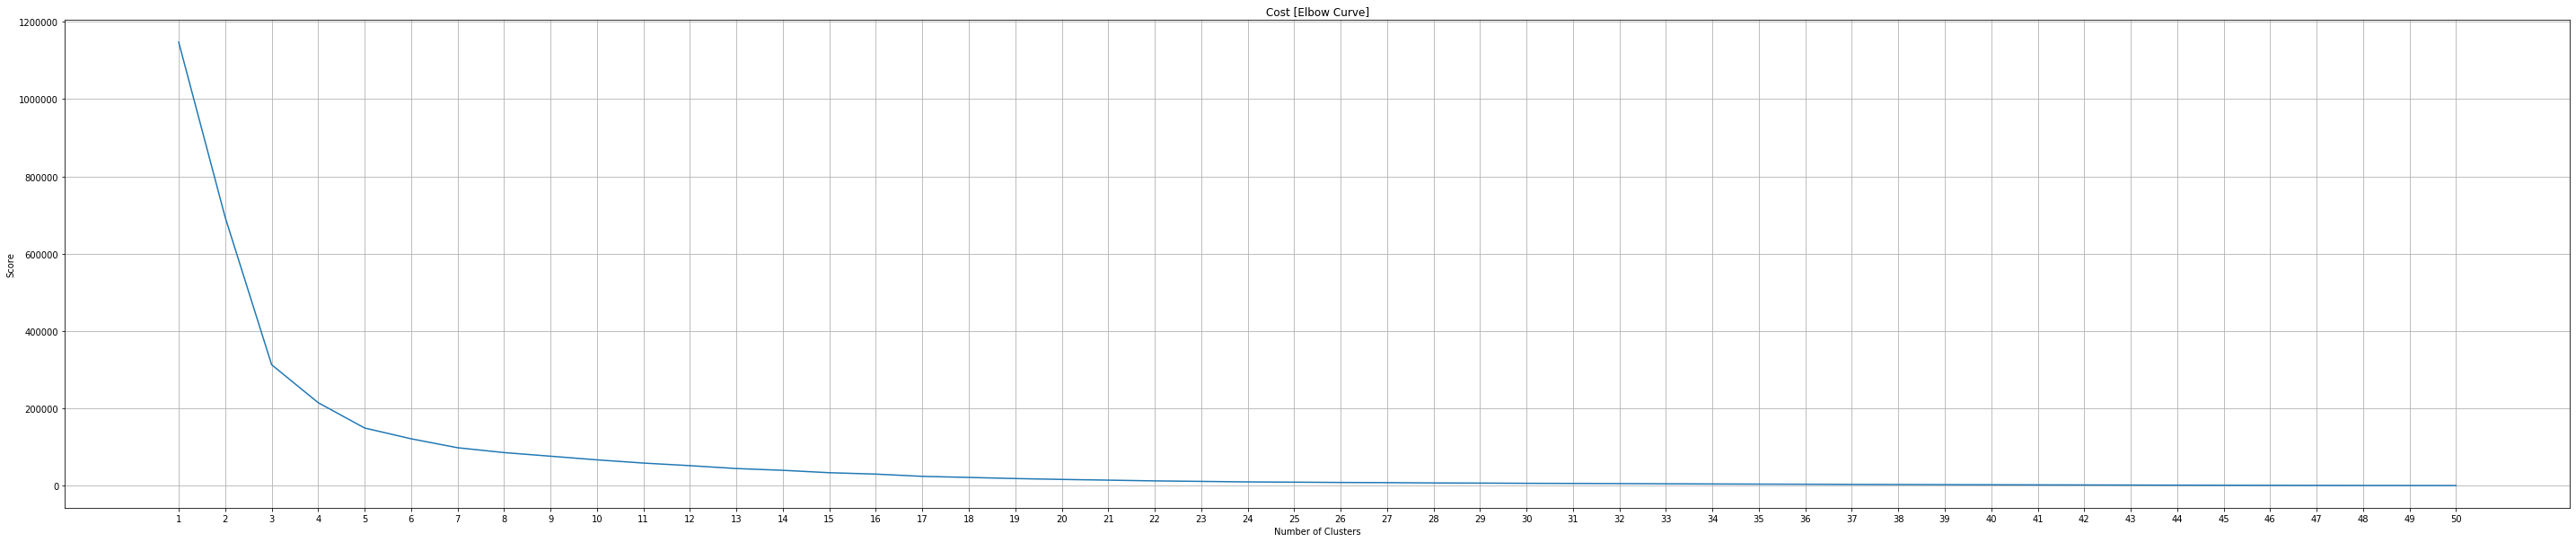

In [40]:

method = "MN_sequenceL"

cluster_df = method_df_dict[method]
cluster_finder = ClusterFinder(cluster_df, NUM_AGENTS)
cluster_finder.display()



In [41]:
best_k = 5
cluster_finder.set(best_k)
prediction = cluster_finder.predict()

In [42]:
prediction

array([1, 0, 3, 5, 0, 5, 0, 0, 0, 3, 1, 0, 3, 1, 0, 0, 4, 0, 2, 1, 2, 3,
       2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 4, 1, 4, 1, 0, 3, 0, 2, 0,
       0, 4, 4, 0, 0, 0], dtype=int32)

In [35]:
prediction

array([2, 1, 0, 2, 1, 1, 1, 1, 1, 4, 2, 1, 0, 2, 1, 1, 5, 1, 3, 2, 3, 0,
       4, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 5, 2, 5, 2, 1, 0, 1, 3, 1,
       1, 5, 5, 1, 1, 1], dtype=int32)

In [36]:
cls_name_dict = {i: [] for i in range(0, 5+1)}
for name, pred in zip(cluster_df.index, prediction):
    print("{}\t:\t{}".format(name, pred))
    cls_name_dict[pred].append(name)

PPO seed=187 rew=282.21	:	2
PPO seed=98 rew=282.24	:	1
PPO seed=203 rew=282.25	:	0
PPO seed=197 rew=282.48	:	2
PPO seed=71 rew=282.55	:	1
PPO seed=283 rew=282.79	:	1
PPO seed=116 rew=283.13	:	1
PPO seed=70 rew=283.20	:	1
PPO seed=201 rew=283.28	:	1
PPO seed=113 rew=283.29	:	4
PPO seed=7 rew=283.41	:	2
PPO seed=128 rew=283.51	:	1
PPO seed=125 rew=283.66	:	0
PPO seed=159 rew=283.72	:	2
PPO seed=112 rew=283.85	:	1
PPO seed=81 rew=283.91	:	1
PPO seed=88 rew=283.96	:	5
PPO seed=250 rew=284.10	:	1
PPO seed=160 rew=284.55	:	3
PPO seed=149 rew=284.60	:	2
PPO seed=76 rew=284.69	:	3
PPO seed=147 rew=285.01	:	0
PPO seed=273 rew=285.04	:	4
PPO seed=85 rew=285.43	:	1
PPO seed=267 rew=285.54	:	1
PPO seed=178 rew=285.63	:	1
PPO seed=73 rew=285.69	:	1
PPO seed=20 rew=285.95	:	4
PPO seed=38 rew=286.04	:	1
PPO seed=104 rew=286.29	:	2
PPO seed=164 rew=286.42	:	1
PPO seed=1 rew=286.70	:	1
PPO seed=146 rew=286.81	:	1
PPO seed=153 rew=286.99	:	1
PPO seed=5 rew=287.08	:	1
PPO seed=26 rew=287.09	:	5
PPO seed=

In [16]:
for i in range(5):
    print(i, sum(prediction==i))

0 4
1 27
2 8
3 3
4 3
